In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gst-pred/Train_60 2/Instructions.txt
/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv
/kaggle/input/gst-pred/Train_60 2/correlation.PNG
/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv
/kaggle/input/gst-pred/Train_60 2/SHA_256.txt
/kaggle/input/gst-pred/Train_60 2/checksum.py
/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv
/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv


In [34]:

df= pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv')
df_test = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv')

In [35]:
df.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column12  Column13  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0         0   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0         0   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1         1   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0         0   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0         0   

   Column14  Column15  Column16  Column17  Column18  Column19  Column20  \
0  0.001351   0.00339       0.0         0       0.0         0         0   
1  0.001351   0.00339       0.0         0       0.0         0         0   
2  0.001351   0.00339       0.0         0       0.0         0         0   
3       NaN   0.00339       0.0         0       1.0         0         0   
4       NaN   0.00339       0.0         0       0.0         0         0   

   Column21  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        261712 non-null  object 
 1   Column0   261710 non-null  float64
 2   Column1   261712 non-null  int64  
 3   Column2   261712 non-null  float64
 4   Column3   219478 non-null  float64
 5   Column4   219002 non-null  float64
 6   Column5   206053 non-null  float64
 7   Column6   260478 non-null  float64
 8   Column7   261712 non-null  float64
 9   Column8   260478 non-null  float64
 10  Column9   17859 non-null   float64
 11  Column10  261712 non-null  int64  
 12  Column11  261712 non-null  int64  
 13  Column12  261712 non-null  int64  
 14  Column13  261712 non-null  int64  
 15  Column14  140033 non-null  float64
 16  Column15  256227 non-null  float64
 17  Column16  261712 non-null  float64
 18  Column17  261712 non-null  int64  
 19  Column18  261712 non-null  float64
 20  Colu

In [38]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

ID           0.000000
Column0      0.001146
Column1      0.000000
Column2      0.000000
Column3     16.086829
Column4     16.266034
Column5     21.293208
Column6      0.490363
Column7      0.000000
Column8      0.490363
Column9     93.250061
Column10     0.000000
Column11     0.000000
Column12     0.000000
Column13     0.000000
Column14    46.578478
Column15     2.095951
Column16     0.000000
Column17     0.000000
Column18     0.000000
Column19     0.000000
Column20     0.000000
Column21     0.000000
dtype: float64


In [39]:
missing_values = df_test.isnull().sum()
missing_percentage = (missing_values / len(df_test)) * 100
print(missing_percentage)

ID           0.000000
Column0      0.000764
Column1      0.000000
Column2      0.000000
Column3     16.137586
Column4     16.319466
Column5     21.267271
Column6      0.471511
Column7      0.000000
Column8      0.471511
Column9     93.176087
Column10     0.000000
Column11     0.000000
Column12     0.000000
Column13     0.000000
Column14    46.493474
Column15     2.095815
Column16     0.000000
Column17     0.000000
Column18     0.000000
Column19     0.000000
Column20     0.000000
Column21     0.000000
dtype: float64


In [40]:
# df = df.drop(columns=['Column9'])
# df_test = df_test.drop(columns=['Column9'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

In [42]:
df['Column14'].fillna(df['Column14'].mean(), inplace=True)
df['Column3'].fillna(df['Column3'].mean(), inplace=True)
df['Column4'].fillna(df['Column4'].mean(), inplace=True)
df['Column5'].fillna(df['Column5'].mean(), inplace=True)
df['Column9'].fillna(df['Column5'].mean(), inplace=True)
# For columns with minimal missing values, you can do the same
df['Column0'].fillna(df['Column0'].mean(), inplace=True)
df['Column6'].fillna(df['Column6'].mean(), inplace=True)
df['Column8'].fillna(df['Column8'].mean(), inplace=True)
df['Column15'].fillna(df['Column15'].mean(), inplace=True)
# Recheck for missing values
print(df.isnull().sum())



ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


/tmp/ipykernel_30/3293214347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Column14'].fillna(df['Column14'].mean(), inplace=True)
/tmp/ipykernel_30/3293214347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [43]:
y_train=pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv')

In [44]:
data = pd.merge(df, y_train, on='ID')
data.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0 -0.000210   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0  0.001351   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0  0.001351   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1  0.001351   
3 -0.000855 -0.000367 -0.407939 -0.015607 -0.774979  ...         0 -0.000863   
4 -1.855728 -0.000367 -0.407939 -0.015607 -0.774979  ...         0 -0.000863   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       1.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       1  
4       0  

[5 rows x 24 columns]

In [45]:
df_test['Column14'].fillna(df['Column14'].mean(), inplace=True)
df_test['Column3'].fillna(df['Column3'].mean(), inplace=True)
df_test['Column4'].fillna(df['Column4'].mean(), inplace=True)
df_test['Column5'].fillna(df['Column5'].mean(), inplace=True)
df_test['Column9'].fillna(df['Column9'].mean(), inplace=True)
# For columns with minimal missing values, you can do the same
df_test['Column0'].fillna(df['Column0'].mean(), inplace=True)
df_test['Column6'].fillna(df['Column6'].mean(), inplace=True)
df_test['Column8'].fillna(df['Column8'].mean(), inplace=True)
df_test['Column15'].fillna(df['Column15'].mean(), inplace=True)
# Recheck for missing values
print(df_test.isnull().sum())
# change df to df_test

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


/tmp/ipykernel_30/3725634822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Column14'].fillna(df['Column14'].mean(), inplace=True)
/tmp/ipykernel_30/3725634822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [46]:
y_test =pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv')

In [47]:
data1 = pd.merge(df_test, y_test, on='ID')
data1.head()

ID  Column0  Column1  Column2   Column3  \
0  07cf2025382f6325b316e128b1b90999      1.0     1986     53.0  0.678139   
1  eb972eb3a1f8d0d1a13f45e7c07d37d4      2.0     1579     12.0  0.678139   
2  ee35e164b3ddc25a9f40243b81ad290d      0.0      898   3817.0 -2.028572   
3  28229ccd7bad7dd83324a4175a7e0531      0.0       79   3449.0 -0.675216   
4  2f94873da2c332d28f111742818e0fbb      1.0      646   6510.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007469 -0.407939 -0.015607  0.554860  ...         1  0.001351   
1  0.701403 -0.007468 -0.407939 -0.015607  0.142149  ...         0  0.001351   
2 -1.855728 -0.000367 -0.407939 -0.015607 -0.774979  ...         0 -0.000863   
3 -0.577162 -0.007469  0.004020 -0.015607  0.635264  ...         1  0.001351   
4 -1.855728 -0.000367 -0.407939 -0.015434 -0.774979  ...         1 -0.000863   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       0.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 24 columns]

In [48]:
from sklearn.preprocessing import StandardScaler
features = data.drop(columns=['ID']) 
features1 = data1.drop(columns=['ID'])    # Replace with your actual target column name
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_test = scaler.fit_transform(features1)

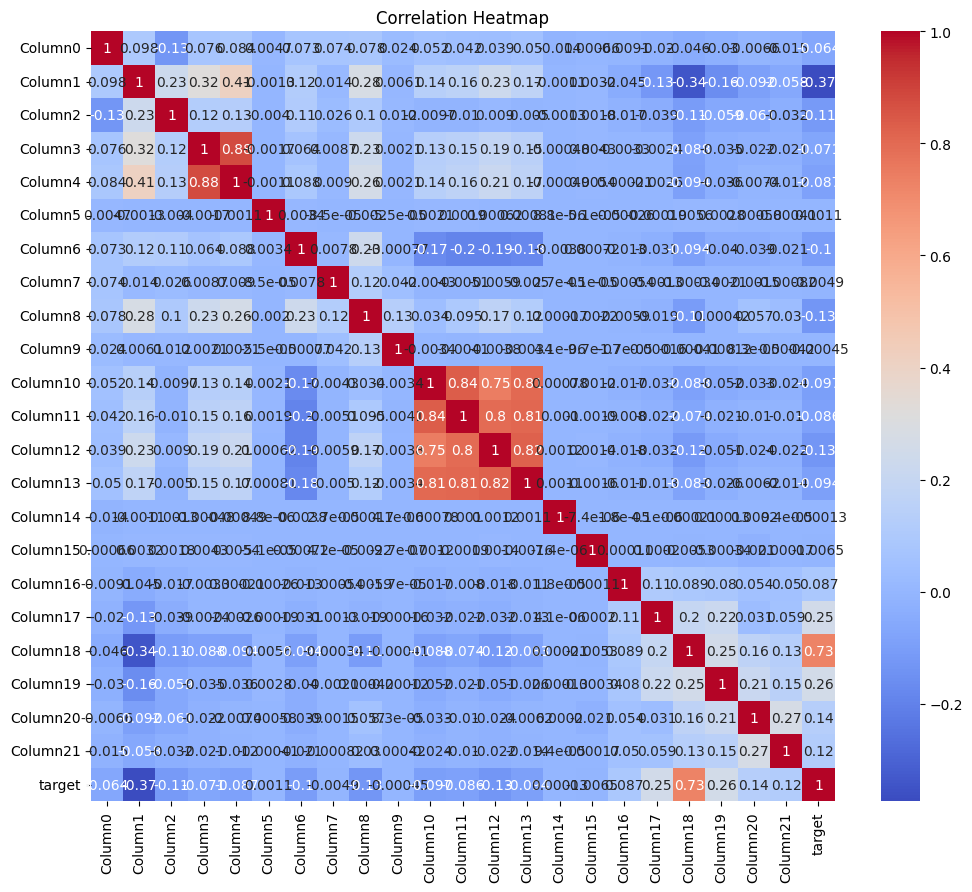

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(features_scaled, columns=features.columns).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

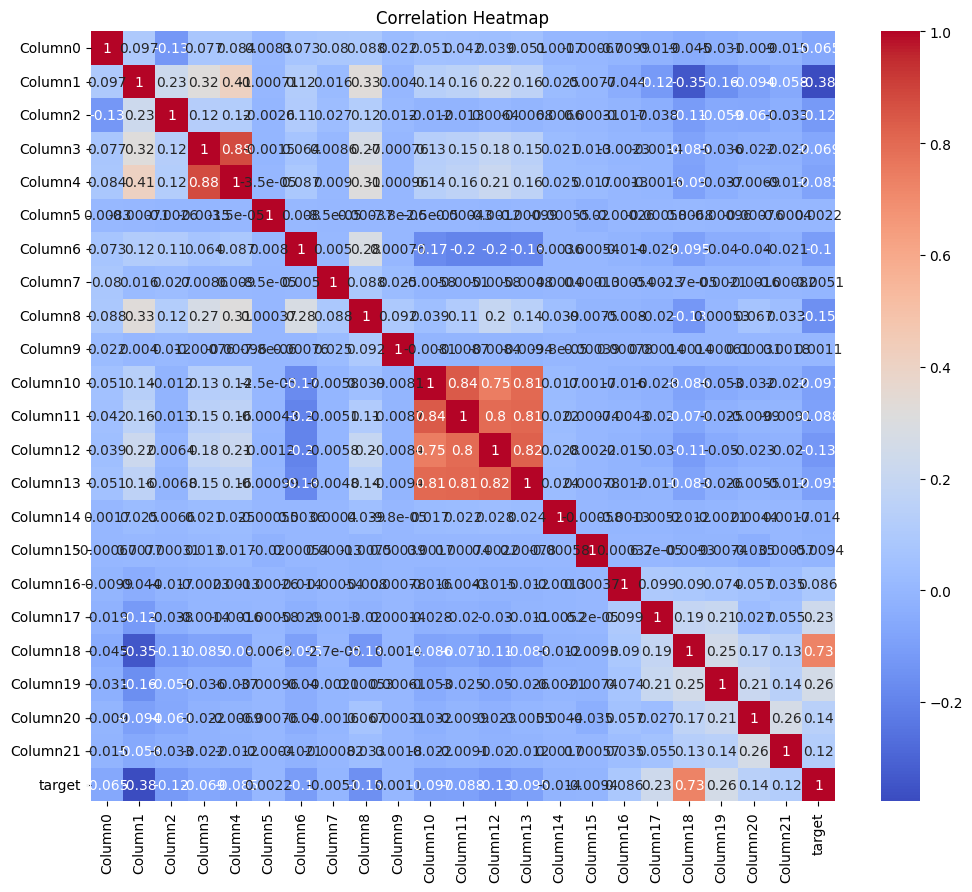

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(features_scaled_test, columns=features.columns).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Load the reduced dataset (final_df)
# Note: Assuming 'final_df' contains the PCA-transformed features and the 'target' column

# Define features and target
X_train = data.drop(columns=['ID','target'])  # Features (all PCA components)
y_train = data['target']  # Target variable
X_test = data1.drop(columns=['ID','target'])  # Features (all PCA components)
y_test = data1['target']  # Target variable

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # max_iter is set high to ensure convergence

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model 1 Accuracy: 0.9687
Model 1 Balanced Accuracy: 0.9313
Model 1 ROC-AUC Score: 0.9893
Model 1 Precision: 0.8033
Model 1 Recall: 0.8852
Model 1 F1 Score: 0.8423

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.80      0.89      0.84     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.93      0.91    261712
weighted avg       0.97      0.97      0.97    261712



In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
rforest = RandomForestClassifier(n_estimators=100)

# Train the model
rforest.fit(X_train, y_train)

# Make predictions
y_pred = rforest.predict(X_test)

# Evaluate the model
# print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rforest.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Model 1 Accuracy: 0.9769
Model 1 Balanced Accuracy: 0.9507
Model 1 ROC-AUC Score: 0.9941
Model 1 Precision: 0.8485
Model 1 Recall: 0.9185
Model 1 F1 Score: 0.8821
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712

[[232987   4047]
 [  2011  22667]]


In [53]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Model 1 Accuracy: 0.9783
Model 1 Balanced Accuracy: 0.9592
Model 1 ROC-AUC Score: 0.9949
Model 1 Precision: 0.8498
Model 1 Recall: 0.9357
Model 1 F1 Score: 0.8907
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [54]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712

[[232954   4080]
 [  1588  23090]]


In [55]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=1000,            # Number of boosting iterations
    learning_rate=0.1,          # Learning rate
    depth=6,                    # Depth of the tree
    loss_function='Logloss',    # Loss function for binary classification
    verbose=0                   # Silent mode
)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


# Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"CatBoost Accuracy: {accuracy:.4f}")



Model 1 Accuracy: 0.9785
Model 1 Balanced Accuracy: 0.9601
Model 1 ROC-AUC Score: 0.9949
Model 1 Precision: 0.8498
Model 1 Recall: 0.9374
Model 1 F1 Score: 0.8914
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [56]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712

[[232945   4089]
 [  1546  23132]]


In [57]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define base models (excluding SVM)
base_models = [
    ('random_forest', RandomForestClassifier()),
    ('xgboost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    passthrough=False  # Use the original features in the final estimator
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Calculate accuracy
y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Model 1 Accuracy: 0.9785
Model 1 Balanced Accuracy: 0.9601
Model 1 ROC-AUC Score: 0.9949
Model 1 Precision: 0.8498
Model 1 Recall: 0.9374
Model 1 F1 Score: 0.8914
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [58]:
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [59]:
# from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# # Define individual models (excluding SVM)
# voting_models = [
#     ('random_forest', RandomForestClassifier()),
#     ('xgboost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
# ]

# # Define the voting classifier (soft voting)
# voting_model = VotingClassifier(
#     estimators=voting_models,
#     voting='soft'  # Use 'soft' for averaging predicted probabilities or 'hard' for majority voting
# )

# # Train the voting model
# voting_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = voting_model.predict(X_test)

# # Calculate accuracy
# y_pred = catboost_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, voting_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print(f"Model 1 Accuracy: {accuracy:.4f}")
# print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
# print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
# print(f"Model 1 Precision: {precision:.4f}")
# print(f"Model 1 Recall: {recall:.4f}")
# print(f"Model 1 F1 Score: {f1:.4f}")
# print(classification_report(y_test, y_pred))


In [60]:
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [61]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import AdaBoostClassifier

# # Initialize the XGBoost classifier
# abc = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=0)

# # Train Adaboost Classifer
# ada_model = abc.fit(X_train, y_train)

# # Train the model
# # xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = ada_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print(f"Model 1 Accuracy: {accuracy:.4f}")
# print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
# print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
# print(f"Model 1 Precision: {precision:.4f}")
# print(f"Model 1 Recall: {recall:.4f}")
# print(f"Model 1 F1 Score: {f1:.4f}")
# print(classification_report(y_test, y_pred))


In [62]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score

# # Initialize the CatBoost classifier
# catboost_model = CatBoostClassifier(
#     iterations=1000,            # Number of boosting iterations
#     learning_rate=0.1,          # Learning rate
#     depth=6,                    # Depth of the tree
#     loss_function='Logloss',    # Loss function for binary classification
#     verbose=0                   # Silent mode
# )

# # Train the model
# catboost_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = catboost_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"CatBoost Accuracy: {accuracy:.4f}")


In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report

# Initialize the MLP classifier
seed = 42
mlp = MLPClassifier(random_state=seed)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# Calculate accuracy and other metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
balanced_accuracy_mlp = balanced_accuracy_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
precision_mlp = precision_score(y_test, y_pred_mlp, average='binary')
recall_mlp = recall_score(y_test, y_pred_mlp, average='binary')
f1_mlp = f1_score(y_test, y_pred_mlp, average='binary')

print(f"MLP Accuracy: {accuracy_mlp:.4f}")
print(f"MLP Balanced Accuracy: {balanced_accuracy_mlp:.4f}")
print(f"MLP ROC-AUC Score: {roc_auc_mlp:.4f}")
print(f"MLP Precision: {precision_mlp:.4f}")
print(f"MLP Recall: {recall_mlp:.4f}")
print(f"MLP F1 Score: {f1_mlp:.4f}")
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.9729
MLP Balanced Accuracy: 0.9537
MLP ROC-AUC Score: 0.9923
MLP Precision: 0.8102
MLP Recall: 0.9301
MLP F1 Score: 0.8660
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.81      0.93      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.95      0.93    261712
weighted avg       0.98      0.97      0.97    261712



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


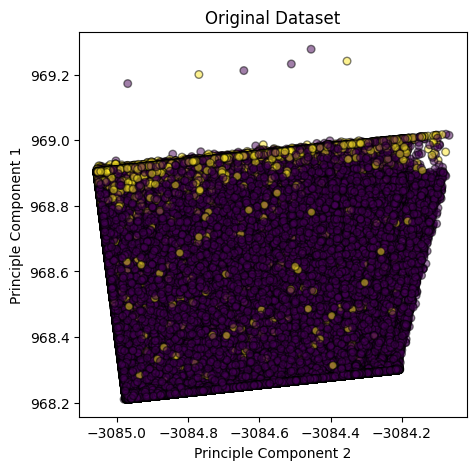

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the dataset on both train and test sets.
# Note that we fit MinMaxScaler on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_1 = scaler.transform(X_train)
X_test_1 = scaler.transform(X_test)

# Perform PCA Decomposition on both train and test sets
# Note that we fit PCA on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train_1)
X_test_pca = pca.transform(X_test_1)

# Function for plotting dataset 
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

# Plot dataset
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

In [65]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)

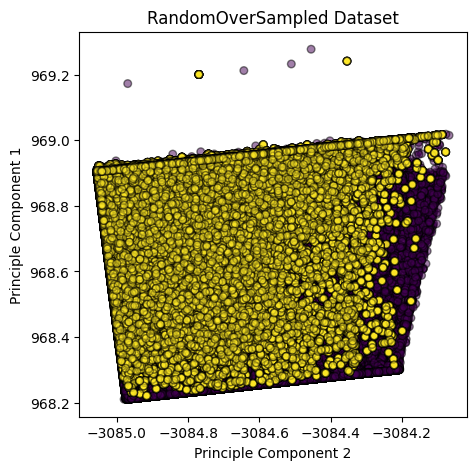

In [66]:
# Plot dataset
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_ros, y_train_ros, ax, title='RandomOverSampled Dataset')

In [67]:
X_train_ros_final, y_train_ros_final = ros.fit_resample(X_train, y_train)

In [68]:
logreg = LogisticRegression(max_iter=1000)  # max_iter is set high to ensure convergence

# Train the model
logreg.fit(X_train_ros_final, y_train_ros_final)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model 1 Accuracy: 0.9646
Model 1 Balanced Accuracy: 0.9803
Model 1 ROC-AUC Score: 0.9892
Model 1 Precision: 0.7272
Model 1 Recall: 0.9996
Model 1 F1 Score: 0.8419

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.73      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712



In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_ros_final, y_train_ros_final)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Model 1 Accuracy: 0.9724
Model 1 Balanced Accuracy: 0.9825
Model 1 ROC-AUC Score: 0.9948
Model 1 Precision: 0.7754
Model 1 Recall: 0.9951
Model 1 F1 Score: 0.8716
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.78      1.00      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712



In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from imblearn.over_sampling import ADASYN
from sklearn.utils import shuffle

# Perform random sampling
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Perform random sampling
adasyn = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = shuffle(X_train_smote, y_train_smote, random_state=42)
X_train_adasyn, y_train_adasyn = shuffle(X_train_adasyn, y_train_adasyn, random_state=42)

In [72]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Model 1 Accuracy: 0.9771
Model 1 Balanced Accuracy: 0.9690
Model 1 ROC-AUC Score: 0.9945
Model 1 Precision: 0.8264
Model 1 Recall: 0.9589
Model 1 F1 Score: 0.8878
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.83      0.96      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [73]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Model 1 Accuracy: 0.9766
Model 1 Balanced Accuracy: 0.9694
Model 1 ROC-AUC Score: 0.9944
Model 1 Precision: 0.8218
Model 1 Recall: 0.9604
Model 1 F1 Score: 0.8857
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.82      0.96      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712

